In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

sns.set_style('whitegrid')
%matplotlib inline

## Load Dataset

In [12]:
from sklearn.model_selection import train_test_split

dataset = load_dataset("7Xan7der7/us_airline_sentiment")
print("Available splits:", dataset.keys())

# Load the data
df = pd.DataFrame(dataset['train'])

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['airline_sentiment'])

print(f"Train size: {len(train_df)}")
print(f"Test size: {len(test_df)}")
train_df.head()

Available splits: dict_keys(['train'])
Train size: 11712
Test size: 2928


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1262,5.698630e+17,neutral,1.0000,None,NaN,United,chaddock38,0,@united what would it cost,None,2/23/2015 6:16,"Dartmouth, MA",None
10772,5.688900e+17,neutral,0.6600,None,0.0000,US Airways,CraigHall19701,0,@USAirways Used 2 get emails 1) pre-purchase a...,None,2/20/2015 13:49,Delaware,Eastern Time (US & Canada)
4204,5.677790e+17,negative,1.0000,Cancelled Flight,0.6684,United,shaneadambecker,0,"@united no, it was 2 flight Cancelled Flightla...",None,2/17/2015 12:12,"New York, NY",Atlantic Time (Canada)
5491,5.689480e+17,positive,1.0000,None,NaN,Southwest,kimibader,0,"@SouthwestAir not frustrated, just an idea! Gr...",None,2/20/2015 17:38,"Austin, Texas",Central Time (US & Canada)
12096,5.702930e+17,negative,0.6551,Cancelled Flight,0.3331,American,alicizzle,0,@AmericanAir narrowly made standby...lots of s...,None,2/24/2015 10:42,MiniApple(s),None


## Dataset Info

In [13]:
train_df.info()
print("\nMissing values:")
print(train_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 11712 entries, 1262 to 4927
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      11712 non-null  float64
 1   airline_sentiment             11712 non-null  object 
 2   airline_sentiment_confidence  11712 non-null  float64
 3   negativereason                7343 non-null   object 
 4   negativereason_confidence     8415 non-null   float64
 5   airline                       11712 non-null  object 
 6   name                          11712 non-null  object 
 7   retweet_count                 11712 non-null  int64  
 8   text                          11712 non-null  object 
 9   tweet_coord                   818 non-null    object 
 10  tweet_created                 11712 non-null  object 
 11  tweet_location                7914 non-null   object 
 12  user_timezone                 7865 non-null   object 
dtypes: f

## Class Distribution

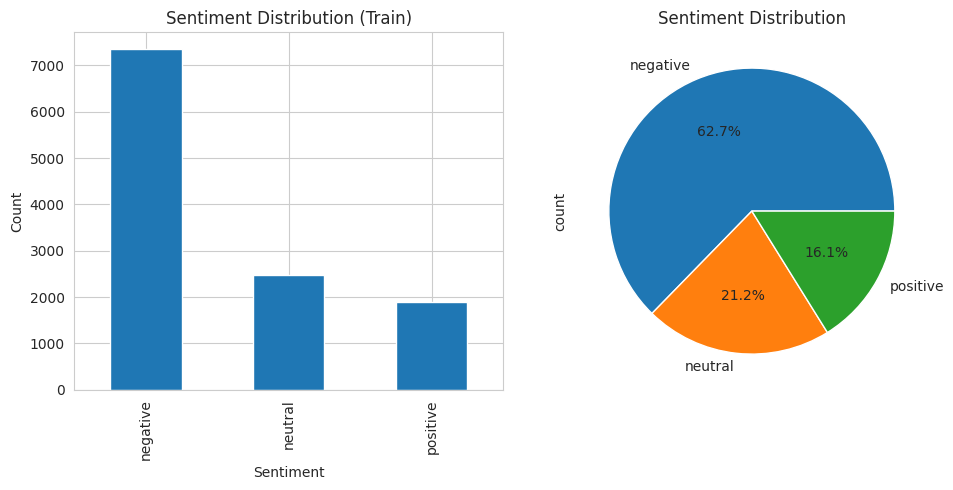

airline_sentiment
negative    7343
neutral     2479
positive    1890
Name: count, dtype: int64


In [14]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
train_df['airline_sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution (Train)')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
train_df['airline_sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sentiment Distribution')

plt.tight_layout()
plt.show()

print(train_df['airline_sentiment'].value_counts())

## Text Statistics

Text Length Statistics:
        text_length    word_count
count  11712.000000  11712.000000
mean     103.924863     17.665813
std       36.221368      6.865444
min       12.000000      2.000000
25%       77.000000     12.000000
50%      115.000000     19.000000
75%      136.000000     23.000000
max      176.000000     33.000000


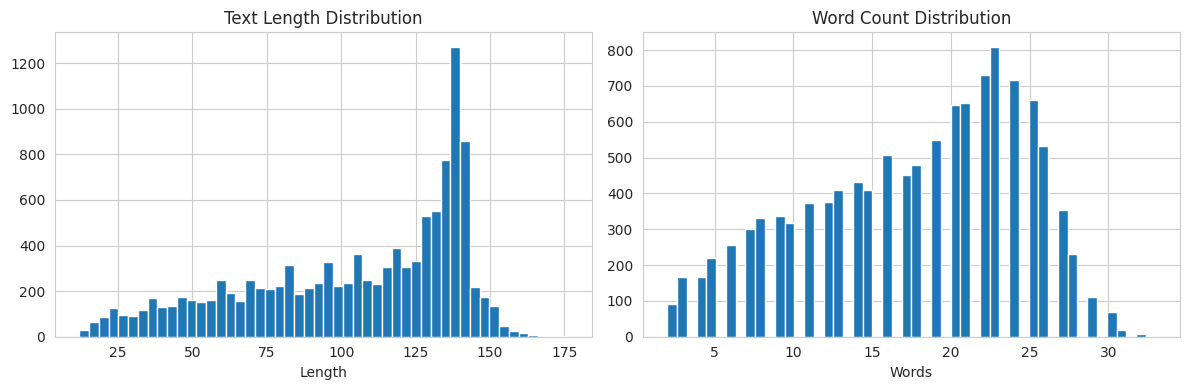

In [15]:
train_df['text_length'] = train_df['text'].str.len()
train_df['word_count'] = train_df['text'].str.split().str.len()

print("Text Length Statistics:")
print(train_df[['text_length', 'word_count']].describe())

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
train_df['text_length'].hist(bins=50)
plt.title('Text Length Distribution')
plt.xlabel('Length')

plt.subplot(1, 2, 2)
train_df['word_count'].hist(bins=50)
plt.title('Word Count Distribution')
plt.xlabel('Words')

plt.tight_layout()
plt.show()

## Sample Texts by Sentiment

In [16]:
for sentiment in train_df['airline_sentiment'].unique():
    print(f"\n{'='*60}")
    print(f"Sentiment: {sentiment.upper()}")
    print('='*60)
    samples = train_df[train_df['airline_sentiment'] == sentiment]['text'].head(3)
    for i, text in enumerate(samples, 1):
        print(f"{i}. {text}")


Sentiment: NEUTRAL
1. @united what would it cost
2. @USAirways Used 2 get emails 1) pre-purchase a snack and 2) when time to check in. Got neither 4 tomorrow's trip. Do they not get sent now?
3. But I don't see AA @united

Sentiment: NEGATIVE
1. @united no, it was 2 flight Cancelled Flightlations (one due to weather, one mechanical) paid own hotel, bag held in transfer. No voucher/compensation
2. @AmericanAir narrowly made standby...lots of snags this trip!
3. @AmericanAir Pay for my accommodations when you are the ones Cancelled Flightling it for no reason and I know your saying (lying) it cause of weather

Sentiment: POSITIVE
1. @SouthwestAir not frustrated, just an idea! Great crew. Thanks! #happycustomer
2. Nice RT @VirginAmerica: The man of steel might be faster, but we have WiFi – just saying. #ScienceBehindTheExperience http://t.co/FGRbpAZSiX
3. @united thanks, i made it.


## Duplicates Check

In [17]:
duplicates = train_df['text'].duplicated().sum()
print(f"Duplicate texts in train: {duplicates}")
print(f"Percentage: {duplicates/len(train_df)*100:.2f}%")

Duplicate texts in train: 133
Percentage: 1.14%
